In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 월별 데이터

In [3]:
df_m = pd.read_csv('../pre_data/월별_통합.csv', index_col=0)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           122 non-null    object 
 1   닭고기가격          122 non-null    int64  
 2   병아리(원/수)       122 non-null    int64  
 3   일별_평균기온        122 non-null    float64
 4   일별_최저기온        122 non-null    float64
 5   일별_최고기온        122 non-null    float64
 6   13도미만_평균기온     58 non-null     float64
 7   13도미만_최저기온     58 non-null     float64
 8   13도미만_최고기온     58 non-null     float64
 9   25도이상_평균기온     13 non-null     float64
 10  25도이상_최저기온     13 non-null     float64
 11  25도이상_최고기온     13 non-null     float64
 12  hot_day        122 non-null    float64
 13  cold_day       21 non-null     float64
 14  import amount  122 non-null    int64  
 15  feedprice      122 non-null    float64
 16  Dubai          122 non-null    float64
 17  Brent          122 non-null    float64
 18  WTI       

In [4]:
df_m = df_m.fillna(0)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           122 non-null    object 
 1   닭고기가격          122 non-null    int64  
 2   병아리(원/수)       122 non-null    int64  
 3   일별_평균기온        122 non-null    float64
 4   일별_최저기온        122 non-null    float64
 5   일별_최고기온        122 non-null    float64
 6   13도미만_평균기온     122 non-null    float64
 7   13도미만_최저기온     122 non-null    float64
 8   13도미만_최고기온     122 non-null    float64
 9   25도이상_평균기온     122 non-null    float64
 10  25도이상_최저기온     122 non-null    float64
 11  25도이상_최고기온     122 non-null    float64
 12  hot_day        122 non-null    float64
 13  cold_day       122 non-null    float64
 14  import amount  122 non-null    int64  
 15  feedprice      122 non-null    float64
 16  Dubai          122 non-null    float64
 17  Brent          122 non-null    float64
 18  WTI       

In [5]:
df_m.drop(columns=['Dubai', 'Brent', 'WTI'], inplace=True)

In [6]:
corr_m_data = df_m.corr()
corr_m_data

,닭고기가격,병아리(원/수),일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,25도이상_최저기온,...,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리,미국기준금리
닭고기가격,1.000000,0.449373,-0.063607,-0.063590,-0.062662,-0.032898,-0.100650,0.006314,0.161319,0.161614,...,0.019518,-0.153648,0.460001,0.415847,0.036340,-0.399329,-0.407222,-0.214788,0.391229,-0.247517
병아리(원/수),0.449373,1.000000,-0.171499,-0.188493,-0.153341,0.157013,0.023480,0.190438,-0.078983,-0.080652,...,-0.072501,-0.196112,-0.209868,-0.105874,0.186712,-0.317112,0.040240,0.024180,-0.112758,0.161601
일별_평균기온,-0.063607,-0.171499,1.000000,0.996442,0.996802,-0.237409,0.466934,-0.560738,0.500350,0.500236,...,-0.580036,0.221133,0.028039,-0.002026,0.324205,0.556615,0.032940,0.461686,-0.113238,-0.021942
일별_최저기온,-0.063590,-0.188493,0.996442,1.000000,0.986894,-0.261950,0.436424,-0.575600,0.522632,0.522763,...,-0.555559,0.217524,0.034254,0.001447,0.295594,0.564440,0.036460,0.470844,-0.111027,-0.028370
일별_최고기온,-0.062662,-0.153341,0.996802,0.986894,1.000000,-0.213421,0.493620,-0.543921,0.475187,0.474825,...,-0.600557,0.224786,0.022407,-0.004479,0.352663,0.543532,0.032499,0.450704,-0.115126,-0.013928
13도미만_평균기온,-0.032898,0.157013,-0.237409,-0.261950,-0.213421,1.000000,0.706372,0.925761,-0.187366,-0.187352,...,-0.321222,-0.058713,-0.055612,-0.077572,0.211652,-0.104336,0.046788,-0.220865,-0.038662,0.060537
13도미만_최저기온,-0.100650,0.023480,0.466934,0.436424,0.493620,0.706372,1.000000,0.387378,0.055554,0.055550,...,-0.735036,0.083873,-0.035271,-0.074970,0.443700,0.242421,0.080973,0.123390,-0.124984,0.017034
13도미만_최고기온,0.006314,0.190438,-0.560738,-0.575600,-0.543921,0.925761,0.387378,1.000000,-0.274407,-0.274387,...,-0.025937,-0.120563,-0.057585,-0.063004,0.036556,-0.261267,0.023932,-0.350794,0.012946,0.078239
25도이상_평균기온,0.161319,-0.078983,0.500350,0.522632,0.475187,-0.187366,0.055554,-0.274407,1.000000,0.999838,...,-0.134133,0.071830,0.024969,0.022734,0.002274,0.350396,-0.005401,0.203459,-0.009450,0.045317
25도이상_최저기온,0.161614,-0.080652,0.500236,0.522763,0.474825,-0.187352,0.055550,-0.274387,0.999838,1.000000,...,-0.134123,0.071921,0.026871,0.023367,0.000557,0.350166,-0.005775,0.203628,-0.008872,0.042894


#### 상관관계 분석
음적 선형관계

- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

상관 관계 없음


- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계

양적 선형관계


- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [7]:
corr_m_data = corr_m_data[(corr_m_data['닭고기가격'] >= 0.1) | (corr_m_data['닭고기가격'] <= -0.1)]
corr_m_data

,닭고기가격,병아리(원/수),일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,25도이상_최저기온,...,cold_day,import amount,feedprice,oil_avg,count,도축,소_소비자가_int,돼지_소비자가_int,한국기준금리,미국기준금리
닭고기가격,1.000000,0.449373,-0.063607,-0.063590,-0.062662,-0.032898,-0.100650,0.006314,0.161319,0.161614,...,0.019518,-0.153648,0.460001,0.415847,0.036340,-0.399329,-0.407222,-0.214788,0.391229,-0.247517
병아리(원/수),0.449373,1.000000,-0.171499,-0.188493,-0.153341,0.157013,0.023480,0.190438,-0.078983,-0.080652,...,-0.072501,-0.196112,-0.209868,-0.105874,0.186712,-0.317112,0.040240,0.024180,-0.112758,0.161601
13도미만_최저기온,-0.100650,0.023480,0.466934,0.436424,0.493620,0.706372,1.000000,0.387378,0.055554,0.055550,...,-0.735036,0.083873,-0.035271,-0.074970,0.443700,0.242421,0.080973,0.123390,-0.124984,0.017034
25도이상_평균기온,0.161319,-0.078983,0.500350,0.522632,0.475187,-0.187366,0.055554,-0.274407,1.000000,0.999838,...,-0.134133,0.071830,0.024969,0.022734,0.002274,0.350396,-0.005401,0.203459,-0.009450,0.045317
25도이상_최저기온,0.161614,-0.080652,0.500236,0.522763,0.474825,-0.187352,0.055550,-0.274387,0.999838,1.000000,...,-0.134123,0.071921,0.026871,0.023367,0.000557,0.350166,-0.005775,0.203628,-0.008872,0.042894
25도이상_최고기온,0.160980,-0.077923,0.500330,0.522438,0.475357,-0.187339,0.055546,-0.274368,0.999916,0.999529,...,-0.134113,0.071922,0.023412,0.021847,0.003591,0.350555,-0.004802,0.203519,-0.010275,0.046537
hot_day,0.152975,-0.100339,0.519736,0.536321,0.500582,-0.197212,0.058473,-0.288827,0.865068,0.858721,...,-0.141181,0.090802,-0.015082,0.015601,0.084217,0.385960,-0.010320,0.206593,-0.024306,0.088144
import amount,-0.153648,-0.196112,0.221133,0.217524,0.224786,-0.058713,0.083873,-0.120563,0.071830,0.071921,...,-0.019913,1.000000,-0.095559,0.070299,0.103673,0.340966,0.215237,0.240036,-0.144081,0.165602
feedprice,0.460001,-0.209868,0.028039,0.034254,0.022407,-0.055612,-0.035271,-0.057585,0.024969,0.026871,...,0.079667,-0.095559,1.000000,0.841023,-0.173657,-0.455424,-0.617336,-0.325016,0.764413,-0.533554
oil_avg,0.415847,-0.105874,-0.002026,0.001447,-0.004479,-0.077572,-0.074970,-0.063004,0.022734,0.023367,...,0.133875,0.070299,0.841023,1.000000,-0.078105,-0.471548,-0.637478,-0.431456,0.804324,-0.219106


#### 닭고기가격과 상관성이 높은 변수
양의 상관 관계

- feedprice		    46.3%
- 병아리(원/수)		44.5%
- oil_avg		    41.5%
- 한국 기준금리     39.1%

음의 상관관계

- 도축	           -39.9%
- 소_소비자가 	   -40.7%

#### 닭고기 가격과 약한 상관성을 보이는 변수

양의 상관관계

- 25도이상_평균기온    16.1%
- hot_day(폭염 일수)   15.2%

음의 상관관계

- import amount	      -15.3%
- 돼지_소비자가       -21.4%
- 미국기준금리        -24.7%
- 13도미만_최저기온   -10%

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


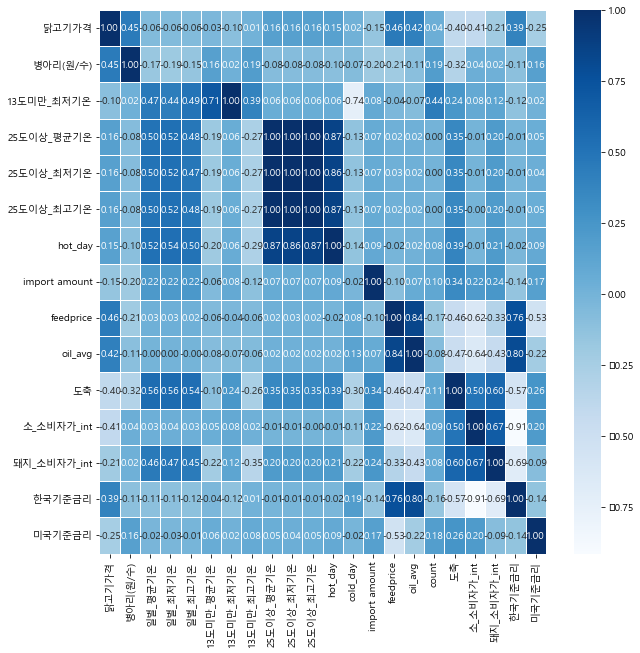

In [8]:
plt.rcParams['font.family']= "Malgun Gothic"
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_m_data,annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

plt.show()
# count = 종계 입식 건수

## 일별 데이터

In [9]:
df_d = pd.read_csv('../pre_data/일별_통합.csv', index_col=0)
df_d = df_d.fillna(0)
df_d.drop(columns=['Dubai', 'Brent', 'WTI'], inplace=True)
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2995
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2996 non-null   object 
 1   price        2996 non-null   int64  
 2   병아리(원/수)     2996 non-null   float64
 3   oil_avg      2996 non-null   float64
 4   일별_평균기온      2996 non-null   float64
 5   일별_최저기온      2996 non-null   float64
 6   일별_최고기온      2996 non-null   float64
 7   13도미만_평균기온   2996 non-null   float64
 8   13도미만_최저기온   2996 non-null   float64
 9   13도미만_최고기온   2996 non-null   float64
 10  25도이상_평균기온   2996 non-null   float64
 11  25도이상_최저기온   2996 non-null   float64
 12  25도이상_최고기온   2996 non-null   float64
 13  소_소비자가_int   2996 non-null   float64
 14  돼지_소비자가_int  2996 non-null   float64
 15  미국기준금리       2996 non-null   float64
 16  한국기준금리       2996 non-null   float64
dtypes: float64(15), int64(1), object(1)
memory usage: 421.3+ KB


In [10]:
corr_d_data = df_d.corr()
corr_d_data

,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,25도이상_최저기온,25도이상_최고기온,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
price,1.000000,0.385414,0.363505,-0.047706,-0.050609,-0.041482,0.007550,-0.050172,0.039991,0.128229,0.127380,0.128829,-0.355802,-0.179151,-0.221882,0.341789
병아리(원/수),0.385414,1.000000,-0.101276,-0.172903,-0.188367,-0.154925,0.140707,0.026505,0.174204,-0.155367,-0.155777,-0.154869,0.037323,0.014472,0.136885,-0.116194
oil_avg,0.363505,-0.101276,1.000000,0.016338,0.018784,0.015303,-0.045329,-0.033139,-0.041558,0.019308,0.019939,0.018549,-0.610025,-0.399577,-0.220455,0.787166
일별_평균기온,-0.047706,-0.172903,0.016338,1.000000,0.986472,0.986279,-0.141988,0.430123,-0.458237,0.510349,0.509777,0.510235,0.005755,0.403557,-0.009594,-0.073649
일별_최저기온,-0.050609,-0.188367,0.018784,0.986472,1.000000,0.948987,-0.171695,0.421774,-0.489563,0.521523,0.522167,0.520636,0.008945,0.411600,-0.016100,-0.072173
일별_최고기온,-0.041482,-0.154925,0.015303,0.986279,0.948987,1.000000,-0.107509,0.430081,-0.409018,0.487859,0.486188,0.488696,0.005054,0.386424,-0.002727,-0.074029
13도미만_평균기온,0.007550,0.140707,-0.045329,-0.141988,-0.171695,-0.107509,1.000000,0.759761,0.921697,-0.176273,-0.176213,-0.176148,0.068907,-0.155346,0.005089,-0.055824
13도미만_최저기온,-0.050172,0.026505,-0.033139,0.430123,0.421774,0.430081,0.759761,1.000000,0.456607,0.030477,0.030467,0.030456,0.061020,0.086819,-0.011103,-0.084851
13도미만_최고기온,0.039991,0.174204,-0.041558,-0.458237,-0.489563,-0.409018,0.921697,0.456607,1.000000,-0.262507,-0.262419,-0.262322,0.063098,-0.264634,0.017653,-0.028767
25도이상_평균기온,0.128229,-0.155367,0.019308,0.510349,0.521523,0.487859,-0.176273,0.030477,-0.262507,1.000000,0.999209,0.999573,-0.032798,0.171967,0.037544,-0.017356


In [11]:
corr_d_data = corr_d_data[(corr_d_data['price'] >= 0.1) | (corr_d_data['price'] <= -0.1)]
corr_d_data

,price,병아리(원/수),oil_avg,일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,25도이상_최저기온,25도이상_최고기온,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
price,1.000000,0.385414,0.363505,-0.047706,-0.050609,-0.041482,0.007550,-0.050172,0.039991,0.128229,0.127380,0.128829,-0.355802,-0.179151,-0.221882,0.341789
병아리(원/수),0.385414,1.000000,-0.101276,-0.172903,-0.188367,-0.154925,0.140707,0.026505,0.174204,-0.155367,-0.155777,-0.154869,0.037323,0.014472,0.136885,-0.116194
oil_avg,0.363505,-0.101276,1.000000,0.016338,0.018784,0.015303,-0.045329,-0.033139,-0.041558,0.019308,0.019939,0.018549,-0.610025,-0.399577,-0.220455,0.787166
25도이상_평균기온,0.128229,-0.155367,0.019308,0.510349,0.521523,0.487859,-0.176273,0.030477,-0.262507,1.000000,0.999209,0.999573,-0.032798,0.171967,0.037544,-0.017356
25도이상_최저기온,0.127380,-0.155777,0.019939,0.509777,0.522167,0.486188,-0.176213,0.030467,-0.262419,0.999209,1.000000,0.997789,-0.033431,0.171097,0.036896,-0.016295
25도이상_최고기온,0.128829,-0.154869,0.018549,0.510235,0.520636,0.488696,-0.176148,0.030456,-0.262322,0.999573,0.997789,1.000000,-0.032248,0.172644,0.037490,-0.018412
소_소비자가_int,-0.355802,0.037323,-0.610025,0.005755,0.008945,0.005054,0.068907,0.061020,0.063098,-0.032798,-0.033431,-0.032248,1.000000,0.671301,0.203186,-0.893199
돼지_소비자가_int,-0.179151,0.014472,-0.399577,0.403557,0.411600,0.386424,-0.155346,0.086819,-0.264634,0.171967,0.171097,0.172644,0.671301,1.000000,-0.080868,-0.650312
미국기준금리,-0.221882,0.136885,-0.220455,-0.009594,-0.016100,-0.002727,0.005089,-0.011103,0.017653,0.037544,0.036896,0.037490,0.203186,-0.080868,1.000000,-0.147994
한국기준금리,0.341789,-0.116194,0.787166,-0.073649,-0.072173,-0.074029,-0.055824,-0.084851,-0.028767,-0.017356,-0.016295,-0.018412,-0.893199,-0.650312,-0.147994,1.000000


#### 닭고기가격과 상관성이 높은 변수
양의 상관 관계

- 병아리(원/수)		38.5%
- oil_avg		    36.3%
- 한국 기준금리     34.1%

음의 상관관계

- 소_소비자가 	   -35.5%
- 미국기준금리     -22.1%

#### 닭고기 가격과 약한 상관성을 보이는 변수

양의 상관관계

- 25도이상_평균기온    12.8%


음의 상관관계

- 돼지_소비자가       -17.9%

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


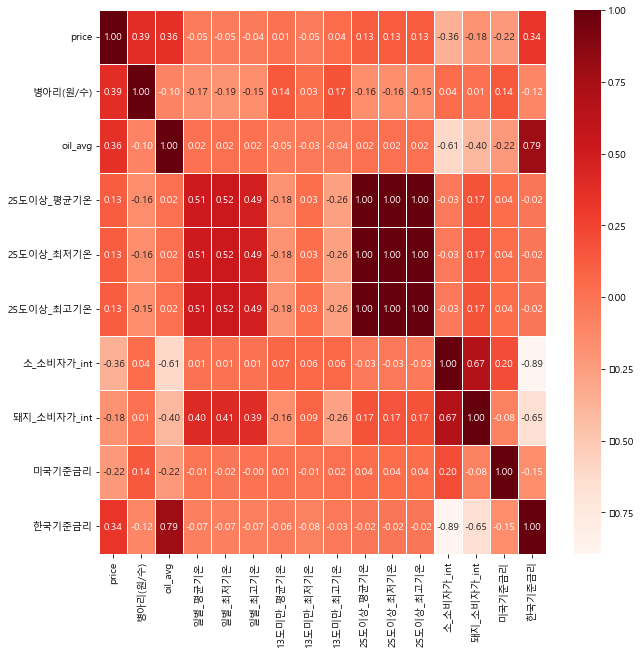

In [12]:
plt.rcParams['font.family']= "Malgun Gothic"
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_d_data,annot=True, fmt='.2f', linewidths=.5, cmap='Reds')

plt.show()

## 수도광열비 데이터 상관도 확인

In [13]:
price = pd.read_csv('../pre_data/월별_닭고기가격.csv')

In [14]:
electronic_fee = pd.read_csv('../data/축산현황_수도광열비_2012_2021.csv')
electronic_fee = electronic_fee[['시점','전국']]
electronic_fee.head()

,시점,전국
0,2012.1/4,69387033
1,2012.2/4,97750378
2,2012.3/4,68540002
3,2012.4/4,76129531
4,2013.1/4,71938194


In [15]:
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.1/4','-03-31')
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.2/4','-06-30')
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.3/4','-09-30')
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.4/4','-12-31')

C:\Users\admin\AppData\Local\Temp\ipykernel_13976\2975682572.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  electronic_fee['시점'] = electronic_fee['시점'].str.replace('.1/4','-03-31')
C:\Users\admin\AppData\Local\Temp\ipykernel_13976\2975682572.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  electronic_fee['시점'] = electronic_fee['시점'].str.replace('.2/4','-06-30')
C:\Users\admin\AppData\Local\Temp\ipykernel_13976\2975682572.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  electronic_fee['시점'] = electronic_fee['시점'].str.replace('.3/4','-09-30')
C:\Users\admin\AppData\Local\Temp\ipykernel_13976\2975682572.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  electronic_fee['시점'] = electronic_fee['시점'].str.replace('.4/4','-12-31')


In [16]:
electronic_fee.rename(columns={'시점':'date','전국':'수도광열비'},inplace=True)

In [17]:
electronic_fee['date'] = pd.to_datetime(electronic_fee['date'])
electronic_fee['수도광열비'] = electronic_fee['수도광열비'].astype('int')

In [18]:
price['date'] = pd.to_datetime(price['date'])
price = price.drop(columns='Unnamed: 0')

In [19]:
quarterly_chicken_price = price.resample('Q',on='date').mean()
quarterly_chicken_price['price'] = quarterly_chicken_price['price'].astype('int')
quarterly_chicken_price.head()

,price
date,
2012-03-31,3679
2012-06-30,3382
2012-09-30,3574
2012-12-31,3459
2013-03-31,3725


In [20]:
quarterly_chicken_price = quarterly_chicken_price.reset_index()

In [21]:
quarterly_df = pd.merge(electronic_fee,quarterly_chicken_price,on='date',how='left')
quarterly_df.head()

,date,수도광열비,price
0,2012-03-31,69387033,3679
1,2012-06-30,97750378,3382
2,2012-09-30,68540002,3574
3,2012-12-31,76129531,3459
4,2013-03-31,71938194,3725


In [22]:
quarterly_df.corr()
# 분기별이라 데이터 간 관계가 크게 보이나, 분기별로 가격 예측에 큰 의미가 없을 것 같아 데이터 목록에서 제외

,수도광열비,price
수도광열비,1.000000,-0.465078
price,-0.465078,1.000000


## 일별 데이터 다중공선성 확인

#### 다중공선성 : 회귀 분석에서 사용된 모형의 일부 예측 변수가 다른 예측 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상

In [24]:
df_daily = pd.read_csv('../pre_data/일별_통합_모델링용.csv', index_col=0)
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily

,date,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,2021-12-31,4047,400,76.703333,111396,25177,0.25,1.00
1,2021-12-30,4047,400,77.850000,111396,25411,0.25,1.00
2,2021-12-29,3895,400,77.566667,112019,26891,0.25,1.00
3,2021-12-28,3895,400,77.130000,110865,26936,0.25,1.00
4,2021-12-27,3743,400,76.530000,109225,26993,0.25,1.00
...,...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200,108.180000,58380,19570,0.75,3.25
2992,2012-01-05,3118,200,108.260000,58870,19830,0.75,3.25
2993,2012-01-04,3118,300,108.470000,61700,20300,0.75,3.25
2994,2012-01-03,3118,300,107.000000,61030,20330,0.75,3.25


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ['병아리(원/수)', 'oil_avg', '소_소비자가_int', '돼지_소비자가_int','미국기준금리', '한국기준금리']
df_daily[scale_columns] = scaler.fit_transform(df_daily[scale_columns])
df_daily.head()

,date,price,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,2021-12-31,4047,0.192624,0.299175,2.310450,1.883652,-0.678886,-0.872994
1,2021-12-30,4047,0.192624,0.346233,2.310450,1.962719,-0.678886,-0.872994
2,2021-12-29,3895,0.192624,0.334605,2.353159,2.462805,-0.678886,-0.872994
3,2021-12-28,3895,0.192624,0.316685,2.274048,2.478011,-0.678886,-0.872994
4,2021-12-27,3743,0.192624,0.292061,2.161619,2.497271,-0.678886,-0.872994


In [27]:
y_columns = ['병아리(원/수)', 'oil_avg', '소_소비자가_int', '돼지_소비자가_int', '미국기준금리', '한국기준금리']

df_daily[y_columns].head()

,병아리(원/수),oil_avg,소_소비자가_int,돼지_소비자가_int,미국기준금리,한국기준금리
0,0.192624,0.299175,2.310450,1.883652,-0.678886,-0.872994
1,0.192624,0.346233,2.310450,1.962719,-0.678886,-0.872994
2,0.192624,0.334605,2.353159,2.462805,-0.678886,-0.872994
3,0.192624,0.316685,2.274048,2.478011,-0.678886,-0.872994
4,0.192624,0.292061,2.161619,2.497271,-0.678886,-0.872994


In [28]:
from sklearn.model_selection import train_test_split

X = df_daily[y_columns]
y = df_daily['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

In [29]:
X_train.shape, y_train.shape

((2396, 6), (2396,))

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

# VIF값이 10 이상이면 다중공선성에 문제가 존재함 -> 한국기준금리는 회귀 모델링에서 제외되어야함

,features,VIF Factor
0,병아리(원/수),1.1
1,oil_avg,3.4
2,소_소비자가_int,7.9
3,돼지_소비자가_int,2.1
4,미국기준금리,1.2
5,한국기준금리,13.9


# 결론
- 월별 가격 예측 탈락
- 일별 가격 예측 데이터로 가격 예측 실시
- 일별 가격 데이터에서 선택된 변수 : 병아리가격, 국제 유가, 소 소비자가격, 돼지 소비자가격, 미국기준금리